In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
pi=np.pi
pm = np.array((-1,1))
r2d,d2r = 180/pi,pi/180
r2d2,d2r2  = 90/pi,pi/90
ori_wrap = lambda x: SDF.wrap(x*2)/2

import SD_functions as SDF
import responseModel as RM

In [3]:
root = '../../../UMI_analysis/cleanData/'
dat_files = !ls {root}
FLS = [pd.read_csv(f'{root}' + fl,index_col=0) for fl in dat_files]
EV = pd.concat(FLS)

In [315]:
# def corr_plot(x,y,titl='',labs=('','',''),pal='mako',fmt='o'):
#     if x.ndim==1:
#         assert y.ndim==1, 'bad dimensions'
#         # nx,ny = 1,1
#         x = np.expand_dims(x,1)
#         y = np.expand_dims(y,1)
#     elif y.ndim==1:
#         y = np.expand_dims(y,1)
#     nx = x.shape[1]
#     ny = y.shape[1]
#     assert (nx==ny) or (ny==1), 'incompatable # of variables' 
#     these_cols = sns.color_palette(pal,nx)
#     for i in range(nx):
#         xx = x[:,i]
#         if ny>1:
#             yy = y[:,i]
#         else:
#             yy=y[:,0]
#         bad = np.isnan(xx) | np.isnan(yy)
#         xx,yy = xx[~bad],yy[~bad]
#         m,b,r,p,se = scipy.stats.linregress(xx,yy)
#         alt_p = perm_corr(xx,yy)
# #         print(alt_p)
#         # this_r = scipy.stats.pearsonr(x,y)
#         lab = '%s r=%.2f(p=%.3f) [%.3f]' %(labs[i],r,p,alt_p)
#         # print(x.shape)
#         plt.plot(xx,yy,fmt,color=these_cols[i],label=lab)
#         xxx = np.array([np.min(xx),np.max(xx)])
#         plt.plot(xxx,m*xxx+b,color=these_cols[i])
#     plt.xlabel('Response Var (arb)')
#     plt.ylabel('Bias (deg)')
#     plt.title(titl)
#     plt.legend()    
# #     plt.show()

# def perm_corr(x,y,n_perm=1000):
#     # get p-value doing permutations on correlation
#     og_r = scipy.stats.pearsonr(x,y)[0]
#     dist_r = np.zeros(n_perm)
#     xx = x.copy()
#     for pi in range(n_perm):
#         scipy.random.shuffle(xx)
#         dist_r[pi] = scipy.stats.pearsonr(xx,y)[0]
#     ps = [np.mean(dist_r>og_r),np.mean(dist_r<og_r)]
#     return min(ps)

In [3]:
# def angle(s_0,s_1):
#     d = s_0-s_1
#     d[np.abs(d)>90]-= 180*np.sign(d[np.abs(d)>90])
#     return d

In [4]:

# def wrap(x):
#     x[np.abs(x)>90]-=180*np.sign(x[np.abs(x)>90])
#     return x

# def circ_mean(x):
#     # along first dimension if multi-dim
#     rng_90 = np.max(np.abs(x))<=90
#     if rng_90:
#         return np.angle(np.sum(np.exp(1j*x/90*pi),0))*90/pi
# #         return np.angle(np.sum(np.exp(1j*x/90*pi)))*90/pi
#     else:
#         return np.angle(np.sum(np.exp(1j*x/90*pi/2),0))*90/pi*2
# #         return np.angle(np.sum(np.exp(1j*x/90*pi/2)))*90/pi*2
    
# def circ_sd(x):
#     rng_90 = np.max(np.abs(x))<=90
#     if rng_90:
#         R = np.abs(np.mean(np.exp(1j*x/90*pi)))
#     else:
#         R = np.abs(np.mean(np.exp(1j*x/90*pi/2)))
#     return np.sqrt(-2*np.log(R))

# def do_bining(bns,overlap,grouping_var,var,want_var=0,n_boot=1):
    
#     n_bns=len(bns)
#     grouper = np.zeros(len(bns))
#     out = np.zeros((len(bns),n_boot))
#     for i in range(n_bns):
#         if i<overlap:
#             base_ind = (grouping_var<=bns[i+overlap]) | (grouping_var>=bns[i-overlap])
#         elif i>(n_bns-overlap-1):
#             base_ind = (grouping_var>=bns[i-overlap]) | (grouping_var<=bns[i+overlap-n_bns])
#         else:
#             base_ind = (grouping_var>=bns[i-overlap])&(grouping_var<=bns[i+overlap]) # need to figure out 

#         for b in range(n_boot):
#             if n_boot==1:
#                 these_ind=base_ind
#             else:
#                 base_ind_w = np.where(base_ind)[0]
#                 these_ind = np.random.choice(base_ind_w,int(len(base_ind_w)*1),replace=True)
                
#             if (len(these_ind)==0) or (np.sum(these_ind)==0):
#                 out[i,b]=np.nan
#                 continue
#             if want_var==1:
#                 out[i,b] = np.std(var[these_ind])
#             elif want_var==0:
#                 out[i,b] = np.mean(var[these_ind])
#             elif want_var==2:
#                 out[i,b] = circ_mean(var[these_ind])
#             elif want_var==3:
#                 out[i,b] = circ_sd(var[these_ind])
#     return np.squeeze(out)
# def ori_plot(x=0):
#     plt.xlim(-90,90)
#     plt.xticks((-90,-45,0,45,90))
#     if x:
#         plt.plot([-90,90],[0,0],'k--')

(array([6591., 6734., 6780., 6732., 6768., 6765., 6822., 6734., 6672.,
        6915.]),
 array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.]),
 <BarContainer object of 10 artists>)

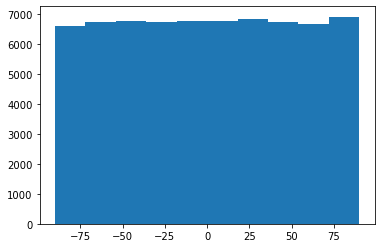

In [7]:
plt.hist(EV.correctAngle)

(array([6673., 6893., 6747., 6635., 6549., 6670., 6908., 6722., 6844.,
        6872.]),
 array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.]),
 <BarContainer object of 10 artists>)

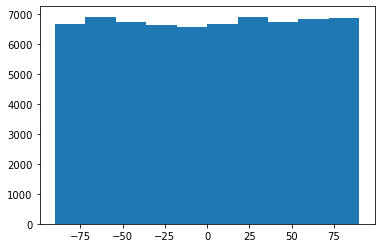

In [13]:
plt.hist(d)

In [6]:
# add grps, d, etc
if any(EV.correctAngle>90):
    EV['correctAngle']-= 90
    EV['distractAngle']-= 90
    EV['respAngle']-= 90

grps = np.linspace(-90,90,9)
d = SDF.get_nb(-1,EV.correctAngle.values,1,ori_wrap)
# d = np.concatenate(([0],angle(EV.correctAngle[:-1].values,EV.correctAngle[1:].values)))


nam = np.zeros(len(grps))
grp_i = np.ones(len(EV),dtype=int)*8
for i in range(len(grps)-1):
    grp_i[(EV.correctAngle>grps[i])&(EV.correctAngle<=grps[i+1])] = i
    nam[i] = np.mean(grps[i:i+2])
nam[i+1] = np.nan
nam = np.round(nam)

correct_grp = nam[grp_i]

grp_i = np.ones(len(d),dtype=int)*8
for i in range(len(grps)-1):
    grp_i[(d>grps[i])&(d<=grps[i+1])] = i
d_grp = nam[grp_i] 

EV['grp'] = correct_grp
EV['d'] = d
EV['d_grp'] = d_grp
EV['E'] = ori_wrap(EV.respAngle-EV.correctAngle)
# angle(EV.respAngle,EV.correctAngle)
grp_1 = np.concatenate((correct_grp[-1:],correct_grp[:-1]))
EV['grp_1'] = grp_1

In [7]:
subjs = np.unique(EV.subject.astype(str))[:-1] # last item is wonky

S = pd.DataFrame()
for subj in subjs:
    this_dat = EV[EV.subject==subj]
    this_E = this_dat.E
    S_ = pd.Series({'subject':subj,'task':this_dat.taskVersion.values[0]})
    S_['aERR'] = np.mean(np.abs(this_E))
    S = S.append(S_,ignore_index=True) 

In [8]:
# Clean Data... expected from random guessing centered on zero
vSet = np.unique(EV.taskVersion)
# vSet = ['local_v8','local_v9','mTurk_v5','mTurk_v6','mTurk_v7']
bad_subj = []
for task in vSet:
    this_dat = S[S.task==task]
    this_E = this_dat.aERR.values
#     n_remove = sum(this_E>30)
    n_bad = sum(this_E>45) # n worse than chance, remove 2x
    n_remove = n_bad * 2
    if n_remove:
        bad_ind = np.argsort(this_E)[-n_remove:]
        bad_err = this_E[bad_ind]
        print(task,bad_err)
        bad_subj.append(this_dat.subject.values[bad_ind])
    else:
        print(task,'Clean')
bad_subj = np.concatenate(bad_subj)
subjs = subjs[~np.isin(subjs,bad_subj)]
cEV = EV.loc[~EV['subject'].isin(bad_subj)]

EVu = cEV[cEV.taskVersion=='local_v4']

local_v10 Clean
local_v4 Clean
local_v8_fast Clean
local_v8_slow Clean
local_v9 Clean
mTurk_v5 [44.39748954 44.69037657 44.69037657 45.64853556 45.9748954  46.42259414]
mTurk_v6 [34.68607764 35.50236673 44.85418852 46.4953529  46.81331606 46.99956597]
mTurk_v7 [41.19916649 47.16106206]


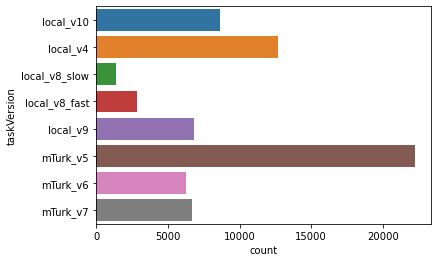

# Subj 226


In [9]:
sns.countplot(y=EV.taskVersion)
plt.show()
print('# Subj %d' %len(S))

# Pooled Bias

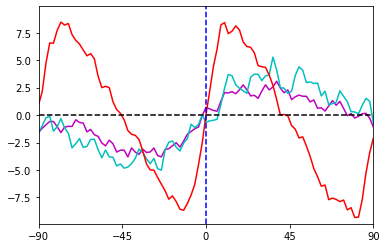

In [10]:
nb=-1
d_ori = SDF.get_nb(nb,cEV['correctAngle'].values,1,ori_wrap)


# d_ori = np.concatenate(([0],SDF.wrap(EV['correctAngle'].values[:-1]-EV['correctAngle'].values[1:])))
n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 1
this_sd = SDF.do_bining(bns,overlap,d_ori,cEV['E']*d2r2,want_var='circ_mean')*r2d2
this_sd_loc = SDF.do_bining(bns,overlap,d_ori[:32326],cEV['E'].values[:32326]*d2r2,want_var='circ_mean')*r2d2
this_sd_m = SDF.do_bining(bns,overlap,d_ori[32326:],cEV['E'].values[32326:]*d2r2,want_var='circ_mean')*r2d2
this_cb = SDF.do_bining(bns,overlap,cEV.correctAngle,cEV['E']*d2r2,want_var='circ_mean')*r2d2
this_cv = SDF.do_bining(bns,overlap*2,cEV.correctAngle,cEV['E']*d2r2,want_var='circ_var')*r2d2
# plt.plot(bns,this_sd)
plt.plot(bns,this_sd_loc,'m')
plt.plot(bns,this_sd_m,'c')
plt.plot(bns,this_cb,color='r')
SDF.d_plot(1,9.9,-90)
plt.show()

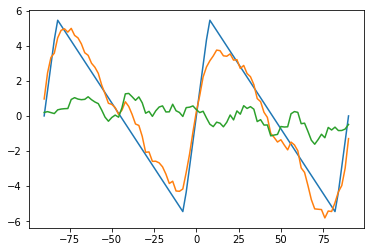

In [231]:
# lets fit fourier, etc.
inds = (cEV.subject!='UCSD000')&(cEV.taskVersion=='local_v4')
# inds = (cEV.subject!='UCSD000')&(cEV.taskVersion=='mTurk_v5')
stim = cEV.loc[inds,'correctAngle'].values+90
resp = cEV.loc[inds, 'respAngle'].values+90
E = cEV.loc[inds, 'E'].values

# corr_fun, bias = RM.correct_cb(stim,resp,E,c_fun='sine',mode='fit_fun')
corr_fun, bias = RM.correct_cb(stim,resp,E,c_fun='sawtooth',mode='fit_fun')
# corr_fun, bias = RM.correct_cb(stim,resp,E,c_fun='fourier',n_param=8,mode='fit_fun')

plt.plot(bns,corr_fun(bns*d2r*2))
plt.plot(bns,bias[0])
plt.plot(bns,bias[1])
plt.show()

# _,_,E_corrected = RM.correct_cb(stim,resp,E,c_fun='sawtooth',mode='E')
# _,_,E_corrected = RM.correct_cb(stim,resp,E,c_fun='fourier',n_param=12,mode='E')

In [255]:
nb_run = (-7,-5,-3,-2,-1,0)
# nb_run = (-1,0)
# n_subj=87
# n_trial=239
n_trial = 360
n_subj = len(stim)//720



_,_resp,E_corrected = RM.correct_cb(stim,resp,E,c_fun='sawtooth',mode='E')#,n_subj=n_subj,n_trial=n_trial)
# _,_resp,E_corrected = RM.correct_cb(stim,resp,E,c_fun='fourier',n_param=12,mode='E',n_subj=n_subj,n_trial=n_trial)

# ,c_fun='fourier',n_param=8
n_trial_total = len(E_corrected[0])
resp_stack = np.concatenate([_resp,_resp])
E_stack = np.stack([E[:n_trial_total],E_corrected[0]])
foo = RM.summarize_sim(stim[:n_trial_total],resp_stack,E_stack,n_subj=n_subj,n_trial=n_trial,nb_run=nb_run,
                       labs=('OG','Corrected'))

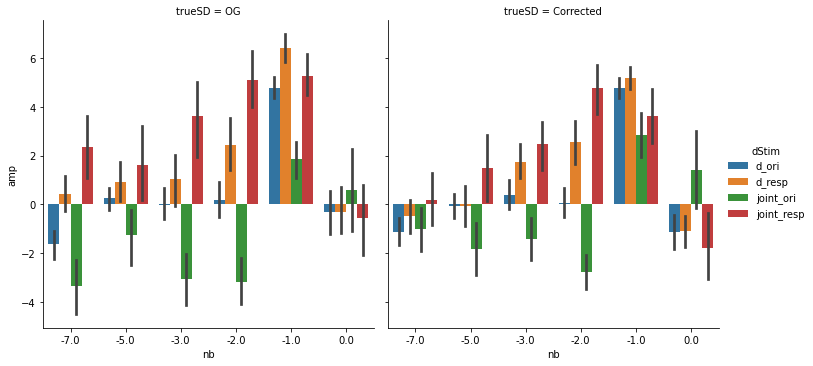

In [256]:
sns.catplot(data=foo,x='nb',y='amp',hue='dStim',kind='bar',col='trueSD',ci=68)
plt.show()

In [726]:
# cardinal bias fitting! 
def sawtooth(p,x_deg):
    x0,y0=p
    if type(x0) is np.ndarray:
        y0[x0<0]*=-1
        x0[x0<0]*=-1
    else:
        if x0<0:
            x0,y0=x0*-1,y0*-1
#     assert x0>=0, 'flip values'
    m0 = y0/x0
    m1 = -2*y0/(90-2*x0)
    b0 = m0*(90-x0)+y0
    b1 = m1*x0-y0
    b3 = -b1
    b4 = -b0

    y_hat = (np.abs(x_deg)<=x0)*(x_deg*m0+0) +\
            ((x_deg>x0)&(np.abs(x_deg)<90-x0))*(x_deg*m1+b3) +\
            ((x_deg<-x0)&(np.abs(x_deg)<90-x0))*(x_deg*m1+b1) +\
            (x_deg<=(-90+x0))*(x_deg*m0+b0) +\
            (x_deg>=(90-x0))*(x_deg*m0+b4)
    return y_hat

def sine_fun(p,x_deg):
    return p[0]*np.sin(x_deg*d2r*4*p[1])

def many_sine(p,x_deg):
    n_sine = len(p)//2
    out = np.zeros(len(x_deg))
    for i in range(n_sine):
        out+= p[i*2]*np.sin(x_deg*d2r*4*p[i*2+1])
    return out
    
def sawtooth_amp(p,x_deg):
    return sawtooth((x0_x,p),x_deg)
    
sine_loss = SDF.rss_fun(sine_fun)
many_sine_loss = SDF.rss_fun(many_sine)

sawtooth_loss = SDF.rss_fun(sawtooth)
sawtooth_loss_amp = SDF.rss_fun(sawtooth_amp)

dog_loss = SDF.rss_fun(SDF.DoG)
doVM_loss = SDF.rss_fun(SDF.Sd_vm)

this_fit_sawtooth = scipy.optimize.minimize(sawtooth_loss,(5,5),(cEV.correctAngle,cEV.E))
this_fit_sine = scipy.optimize.minimize(sine_loss,(5,1),(cEV.correctAngle,cEV.E))
# example fit


In [739]:
this_fit_many_sine = scipy.optimize.minimize(many_sine_loss,(5,1,2,2),(cEV.correctAngle,cEV.E))
this_fit_many_sine

      fun: 21.586589222184386
 hess_inv: array([[ 21.86175253,  -0.03773184, -17.13725939,  -2.24550054],
       [ -0.03773184,   0.16369178,   0.13062254,  -0.07428024],
       [-17.13725939,   0.13062254,  19.06580741,   1.35603048],
       [ -2.24550054,  -0.07428024,   1.35603048,   0.67688961]])
      jac: array([-1.90734863e-06,  4.76837158e-06, -3.81469727e-06,  6.67572021e-06])
  message: 'Optimization terminated successfully.'
     nfev: 150
      nit: 26
     njev: 30
   status: 0
  success: True
        x: array([4.43805614, 0.94760755, 2.04560571, 1.91583096])

In [734]:
this_fit_many_sine = scipy.optimize.minimize(many_sine_loss,(5,1,2,2,2,3),(cEV.correctAngle,cEV.E))
this_fit_many_sine

In [741]:
this_fit_sawtooth

      fun: 21.58245718293793
 hess_inv: array([[136.29547653, -30.69886269],
       [-30.69886269,  27.90266732]])
      jac: array([7.15255737e-07, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 12
     njev: 22
   status: 0
  success: True
        x: array([5.33114878, 6.29296614])

In [745]:
cEV

,subject,taskVersion,trialProb,cueType,correctAngle,distractAngle,respAngle,E,RT,indProbed,grp,d,d_grp,grp_1
0,UCSD100,local_v10,20.0,Arrow,31.206900,34.044400,66.180000,34.973100,5012.2728,0,34.0,0.000000,-11.0,34.0
1,UCSD100,local_v10,80.0,Arrow,32.206900,-55.455600,29.270000,-2.936900,5011.7841,0,34.0,-1.000000,-11.0,34.0
2,UCSD100,local_v10,80.0,Arrow,41.856600,21.003900,-45.270000,-87.126600,5011.7760,0,34.0,-9.649700,-11.0,34.0
3,UCSD100,local_v10,20.0,Arrow,30.862000,49.100200,-75.090000,74.048000,5000.1380,1,34.0,10.994600,11.0,34.0
4,UCSD100,local_v10,80.0,Arrow,42.856600,-69.496100,-60.180000,76.963400,5011.7750,0,34.0,-11.994600,-11.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,_5be50b4daf4be,mTurk_v7,80.0,Number,-64.459393,26.907059,-46.236408,18.222985,1469.0000,0,-56.0,4.374190,11.0,-56.0
6656,_5be50b4daf4be,mTurk_v7,80.0,Number,61.893929,-36.599538,44.615470,-17.278458,25096.0000,0,56.0,53.646678,56.0,-56.0
6657,_5be50b4daf4be,mTurk_v7,80.0,Number,78.806213,1.626402,54.916526,-23.889687,4366.0000,1,79.0,-16.912284,-11.0,56.0
6658,_5be50b4daf4be,mTurk_v7,50.0,Number,47.948427,-20.879400,43.734999,-4.213428,3949.0000,0,56.0,30.857786,34.0,79.0


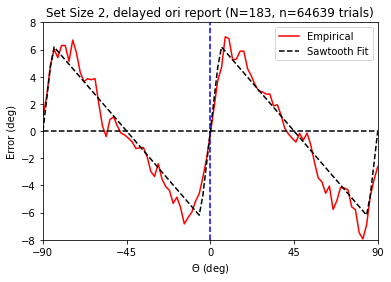

In [747]:


plt.plot(bns,this_cb,color='r',label='Empirical')
SDF.d_plot(1,8,-90)
# plt.plot(bns,sawtooth((10,6),bns),'k--')
plt.plot(bns,sawtooth(this_fit_sawtooth.x,bns),'k--',label='Sawtooth Fit')
# plt.plot(bns,sine_fun(this_fit_sine.x,bns),'b--')
# plt.plot(bns,many_sine(this_fit_many_sine.x,bns),'m--')
plt.xlabel('$\\Theta$ (deg)')
plt.ylabel('Error (deg)')
plt.title('Set Size 2, delayed ori report (N=%d, n=%d trials)' %((n_subj,len(cEV))))
plt.legend()
plt.show()

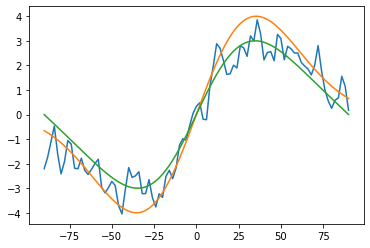

In [177]:
plt.plot(bns,this_sd)
plt.plot(bns,SDF.DoG((4,.02),bns))
plt.plot(bns,SDF.Sd_vm((3,.4),bns*d2r*2))
x0_dog = (2,.015)
y = EV.loc[:,'E']
# this_fit = optimize.minimize(dog_loss,x0_dog,(d_ori,y),method='Nelder-Mead')


In [257]:
x0 = (8.5,7)
x,y = cEV.loc[:,'correctAngle'],cEV.loc[:,'E']
this_fit = optimize.minimize(sawtooth_loss,x0,(x,y))#,method='Nelder-Mead')
this_fit

      fun: 18.305837752046056
 hess_inv: array([[ 55.23233172,  26.46142043],
       [ 26.46142043, 220.96804014]])
      jac: array([9.53674316e-07, 8.34465027e-06])
  message: 'Optimization terminated successfully.'
     nfev: 99
      nit: 19
     njev: 33
   status: 0
  success: True
        x: array([6.34975819, 7.43598425])

(array([6395., 6607., 6445., 6358., 6245., 6395., 6633., 6452., 6520.,
        6589.]),
 array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.]),
 <BarContainer object of 10 artists>)

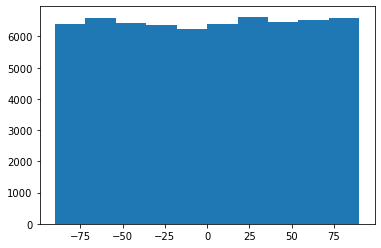

In [441]:
plt.hist(d_ori)

(array([18., 26., 14., 21., 16., 20., 19., 17., 16., 13.]),
 array([-8.98175352e+01, -7.18463832e+01, -5.38752312e+01, -3.59040792e+01,
        -1.79329272e+01,  3.82247814e-02,  1.80093768e+01,  3.59805288e+01,
         5.39516808e+01,  7.19228328e+01,  8.98939848e+01]),
 <BarContainer object of 10 artists>)

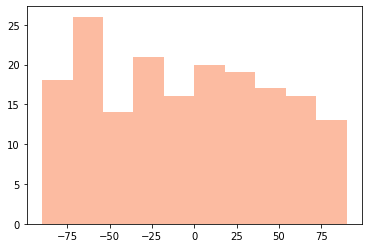

In [632]:
plt.hist(this_d)

(array([ 4.,  2.,  3., 18., 75., 48., 21.,  4.,  3.,  2.]),
 array([-89.36538898, -71.44524672, -53.52510446, -35.6049622 ,
        -17.68481994,   0.23532231,  18.15546457,  36.07560683,
         53.99574909,  71.91589135,  89.83603361]),
 <BarContainer object of 10 artists>)

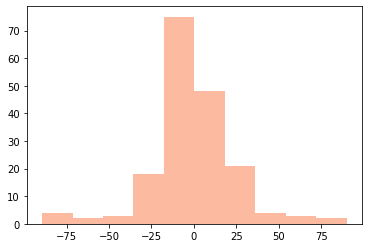

In [640]:
plt.hist(y)

In [644]:
d_distract =  SDF.wrap((cEV.distractAngle-cEV.correctAngle)*2)/2
d_rng = 90
x0_x = 6
# subjs = cEV.subject.unique()
s_grab  = len(subjs)
subjs_view = subjs[:s_grab]

n_subj = len(subjs_view)
overlap=4

# distract_bias = np.zeros((n_subj,n_bns)) #-
bias_all = np.zeros((3,n_subj,n_bns)) # (distract, sd, cb)
tasks_subj = []

summary_stats_all = pd.DataFrame()
for si,subj in enumerate(subjs_view):
    print('%d %s'%(si,subj),end=', ')
    these_ind = cEV.subject.values==subj
    this_task = cEV.loc[these_ind,'taskVersion'].values[0]

#     print(np.sum(these_ind),end=', ')
    x,y = cEV.loc[these_ind,'correctAngle'],cEV.loc[these_ind,'E']
    this_fit = optimize.minimize_scalar(sawtooth_loss_amp,args=(x,y))
#     amps_all[si] = this_fit.x
    
    this_d = d_ori[these_ind]
    this_dist = d_distract[these_ind]
    
    bias_all[0,si] = SDF.do_bining(bns,overlap,this_dist,y)
    bias_all[1,si] = SDF.do_bining(bns,overlap,this_d,y)
    bias_all[2,si] = SDF.do_bining(bns,overlap,x,y)
        
    this_signed_E = np.concatenate((y[(this_d>0)&(this_d<d_rng)],-y[(this_d<0)&(this_d>-d_rng)]))
    distract_signed_E = np.concatenate((y[(this_dist>0)&(this_dist<d_rng)],-y[(this_dist<0)&(this_dist>-d_rng)]))
    
    this_s = {'subj':subj,'task':this_task,'CB_amp':this_fit.x,'SD_npAmp':np.mean(this_signed_E),
              'SD_npAmp_circ':SDF.circ_mean(this_signed_E*d2r*2),'absE':np.mean(np.abs(y)),
             'circ_var':SDF.circ_var(y*d2r*2),'distract_amp':np.mean(distract_signed_E)}
    summary_stats_all = summary_stats_all.append(this_s,ignore_index=1)
    

0 UCSD004, 1 UCSD014, 2 UCSD020, 3 UCSD021, 4 UCSD022, 5 UCSD023, 6 UCSD024, 7 UCSD026, 8 UCSD027, 9 UCSD028, 10 UCSD029, 11 UCSD030, 12 UCSD060, 13 UCSD061, 14 UCSD062, 15 UCSD063, 16 UCSD072, 17 UCSD073, 18 UCSD074, 19 UCSD076, 20 UCSD077, 21 UCSD078, 22 UCSD079, 23 UCSD080, 24 UCSD081, 25 UCSD082, 26 UCSD083, 27 UCSD084, 28 UCSD085, 29 UCSD086, 30 UCSD087, 31 UCSD088, 32 UCSD089, 33 UCSD090, 34 UCSD091, 35 UCSD092, 36 UCSD093, 37 UCSD094, 38 UCSD095, 39 UCSD100, 40 UCSD101, 41 UCSD102, 42 UCSD103, 43 UCSD104, 44 UCSD105, 45 UCSD106, 46 UCSD108, 47 UCSD109, 48 UCSD110, 49 UCSD111, 50 UCSD112, 51 UCSD113, 52 UCSD114, 53 UCSD115, 54 UCSD116, 55 UCSD117, 56 UCSD118, 57 UCSD119, 58 UCSD120, 59 UCSD121, 60 UCSD122, 61 _5b294d31f32f4, 62 _5b296ae9f06f8, 63 _5b296b421bc75, 64 _5b296b9eeb5e0, 65 _5b296e16aa33b, 66 _5b296e6219150, 67 _5b296e8bb1372, 68 _5b29717578a1c, 69 _5b29720a1c6ca, 70 _5b2978a89b4e0, 71 _5b2979be436d3, 72 _5b297b25751fc, 73 _5b297bc750568, 74 _5b297ceb803d5, 75 _5b297d4c

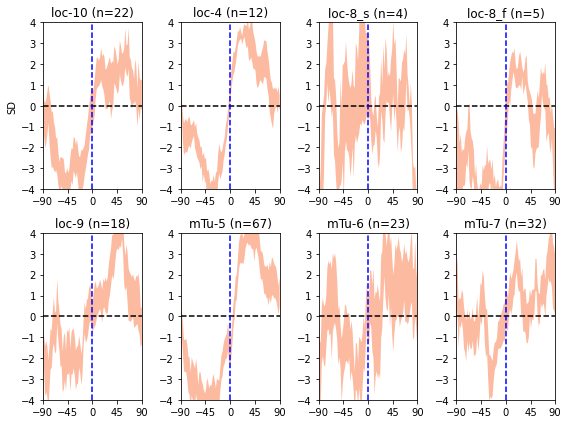

In [645]:
ind = 1 
yl_use = (4,4,12)[ind]
ylab = ('Adapt','SD','Cardinal')[ind]

plt.figure(figsize=(8,6))
for ti,task in enumerate(tasks):
    plt.subplot(2,4,ti+1)
    inds = taskList==task
    SDF.sem_plot(bns,bias_all[ind][inds])
    SDF.d_plot(1,yl_use,-90)  
    plt.title('%s-%s (n=%d)' %(task[:3],task[7:10],sum(inds)))
    if ti==0:
        plt.ylabel(ylab)
plt.tight_layout()
plt.show()

(array([ 2.,  9., 25., 39., 35., 21., 17., 13., 13.,  9.]),
 array([ 2.66181519,  5.36267086,  8.06352654, 10.76438221, 13.46523789,
        16.16609356, 18.86694924, 21.56780491, 24.26866059, 26.96951626,
        29.67037194]),
 <BarContainer object of 10 artists>)

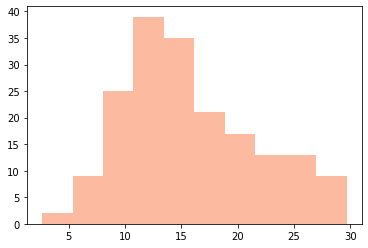

In [659]:
plt.hist(summary_stats_all.absE)

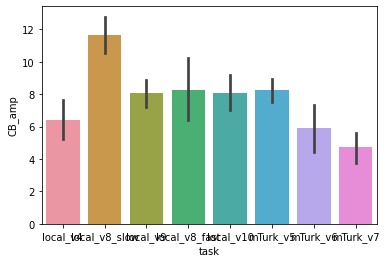

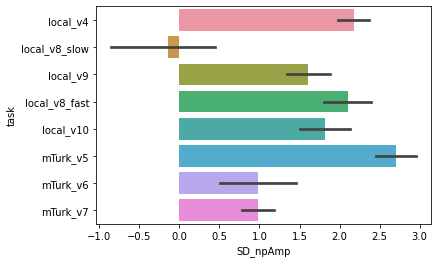

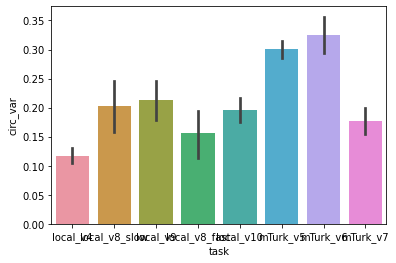

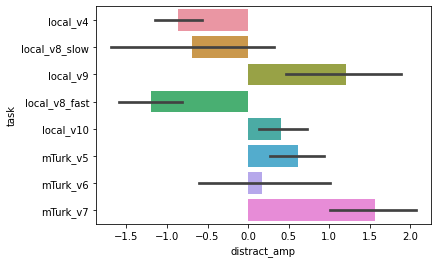

In [691]:
sns.barplot(x='task',y='CB_amp',data=summary_stats_all,ci=68)
plt.show()
sns.barplot(y='task',x='SD_npAmp',data=summary_stats_all,ci=68)
plt.show()
sns.barplot(x='task',y='circ_var',data=summary_stats_all,ci=68)
plt.show()
sns.barplot(y='task',x='distract_amp',data=summary_stats_all,ci=68)
plt.show()

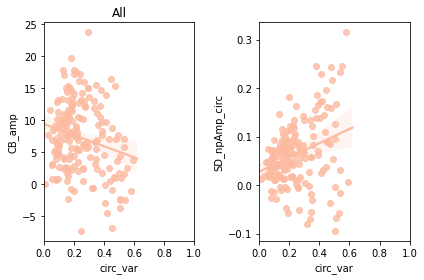

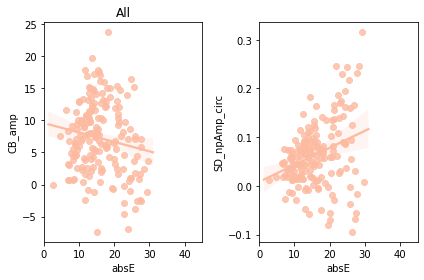

In [663]:
summary_stats = summary_stats_all
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.regplot(data=summary_stats,x='circ_var',y='CB_amp')
plt.title('All')
plt.xlim(xl)
#     plt.show()
plt.subplot(1,2,2)
sns.regplot(data=summary_stats[summary_stats.circ_var<0.9],x='circ_var',y='SD_npAmp_circ')
plt.xlim(xl)
plt.tight_layout()
plt.show()


xl = (0,45)
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.regplot(data=summary_stats,x='absE',y='CB_amp')
plt.title('All')
plt.xlim(xl)
#     plt.show()
plt.subplot(1,2,2)
sns.regplot(data=summary_stats[summary_stats.circ_var<0.9],x='absE',y='SD_npAmp_circ')
plt.xlim(xl)
plt.tight_layout()
plt.show()

In [692]:
summary_stats.task.unique()

array(['local_v4', 'local_v8_slow', 'local_v9', 'local_v8_fast',
       'local_v10', 'mTurk_v5', 'mTurk_v6', 'mTurk_v7'], dtype=object)

In [695]:

t_mturk

array(['mTurk_v5', 'mTurk_v6', 'mTurk_v7'], dtype=object)

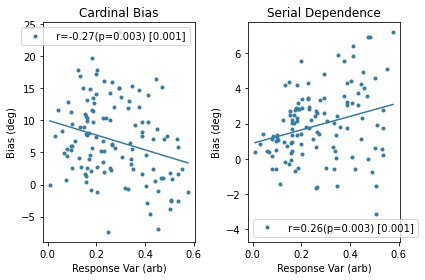

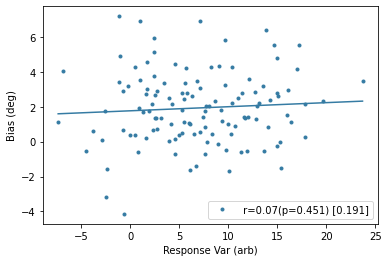

In [701]:
t_local = tasks[:5]

summary_inds_use = ~np.isin(summary_stats.task,t_local)
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
corr_plot(summary_stats[summary_inds_use]['circ_var'],summary_stats[summary_inds_use]['CB_amp'],fmt='k.')
plt.title('Cardinal Bias')

plt.subplot(1,2,2)
corr_plot(summary_stats[summary_inds_use]['circ_var'],summary_stats[summary_inds_use]['SD_npAmp'],fmt='k.')
plt.tight_layout()
plt.title('Serial Dependence')
plt.show()

corr_plot(summary_stats[summary_inds_use]['CB_amp'],summary_stats[summary_inds_use]['SD_npAmp'],fmt='k.')

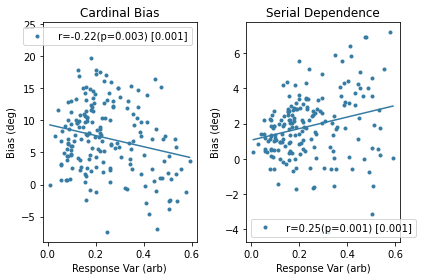

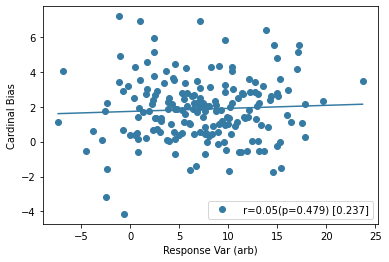

In [688]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
corr_plot(summary_stats['circ_var'],summary_stats['CB_amp'],fmt='k.')
plt.title('Cardinal Bias')

plt.subplot(1,2,2)
corr_plot(summary_stats['circ_var'],summary_stats['SD_npAmp'],fmt='k.')
plt.tight_layout()
plt.title('Serial Dependence')
plt.show()

corr_plot(summary_stats['CB_amp'],summary_stats['SD_npAmp'])
plt.ylabel('Serial Dependence')
plt.ylabel('Cardinal Bias')
plt.show()

(0.5920412484008357, 0.04254796124475442)

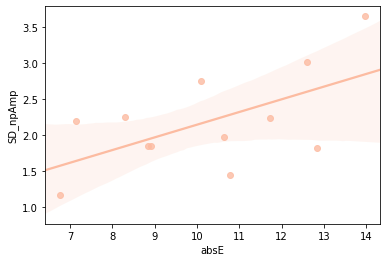

In [670]:
sns.regplot(data=summary_stats[summary_stats.task==tasks[1]],x='absE',y='SD_npAmp')
this_t = scipy.stats.pearsonr(summary_stats[summary_stats.task==tasks[1]].absE,summary_stats[summary_stats.task==tasks[1]].SD_npAmp)
plt.show()

In [676]:
vals = summary_stats.loc[summary_stats.task==task,['circ_var','CB_amp']].values.T
vals[0]

array([0.04293746, 0.46772898, 0.50351279, 0.45035757, 0.0579885 ,
       0.10087207, 0.15266803, 0.09541294, 0.02977262, 0.13920856,
       0.24749847, 0.14730262, 0.07746878, 0.26007982, 0.11068839,
       0.12754722, 0.15601056, 0.09654548, 0.15334474, 0.0809834 ,
       0.15943855, 0.00923423, 0.38862958, 0.13147307, 0.18029667,
       0.10202852, 0.16212135, 0.15805801, 0.08026243, 0.42171392,
       0.0970514 , 0.25545247])

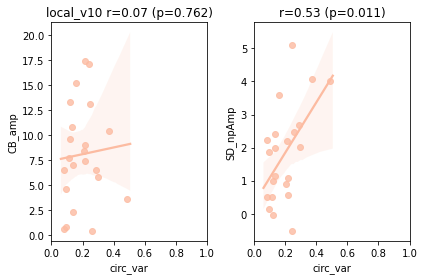

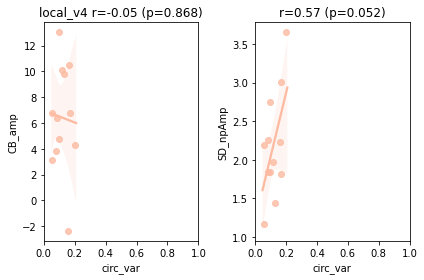

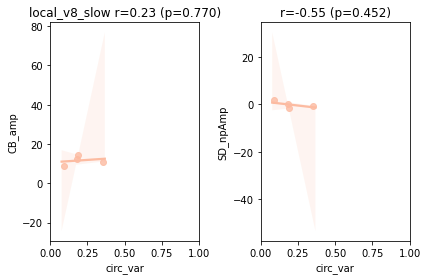

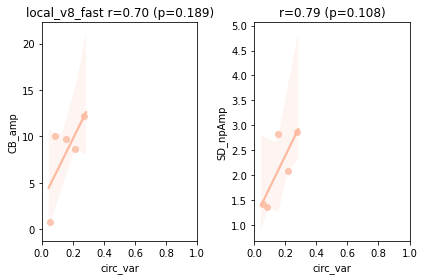

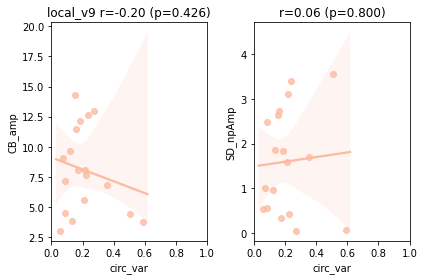

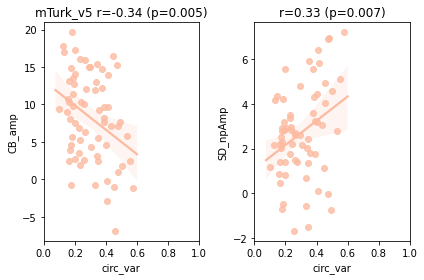

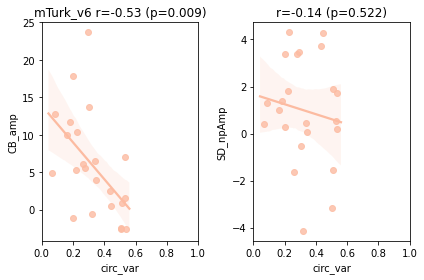

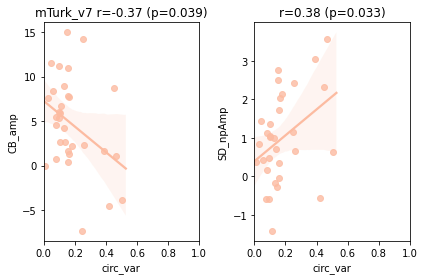

In [683]:
xl = (0,1)
for task in tasks:
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    sns.regplot(data=summary_stats[summary_stats.task==task],x='circ_var',y='CB_amp')
    vals = summary_stats.loc[summary_stats.task==task,['circ_var','CB_amp']].values.T
    this_t = scipy.stats.pearsonr(*vals)

    plt.title('%s r=%.2f (p=%.3f)' %(task,*this_t))
    plt.xlim(xl)
#     plt.show()
    plt.subplot(1,2,2)
    sns.regplot(data=summary_stats[summary_stats.task==task],x='circ_var',y='SD_npAmp')
    plt.xlim(xl)
    vals = summary_stats.loc[summary_stats.task==task,['circ_var','SD_npAmp']].values.T
    this_t = scipy.stats.pearsonr(*vals)

    plt.title('r=%.2f (p=%.3f)' %(*this_t,))
    plt.tight_layout()
    plt.show()

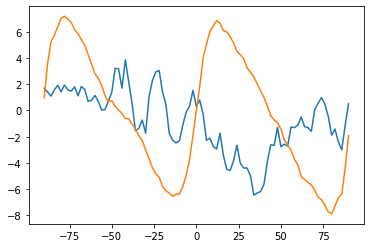

In [305]:
# lets view average of subjects with repulsive bias
cuttoff_attract = summary_stats.CB_amp<0
# cuttoff_attract = summary_stats.circ_var>=.5
attract_bias = summary_stats.subj.values[cuttoff_attract]
repel_bias = summary_stats.subj.values[~cuttoff_attract]
these_inds_attract = np.isin(EV.subject,attract_bias)
these_inds_repel = np.isin(EV.subject,repel_bias)

avg_attract = SDF.do_bining(bns,3,EV.correctAngle.values[these_inds_attract],EV.E.values[these_inds_attract])
avg_repel = SDF.do_bining(bns,3,EV.correctAngle.values[these_inds_repel],EV.E.values[these_inds_repel])
plt.plot(bns,avg_attract)
plt.plot(bns,avg_repel)

# To DO: 
- dig into local v4, see if any clear impacts of retro cue [nothing super clear!]
- split up Mturk_v5 in similar manner

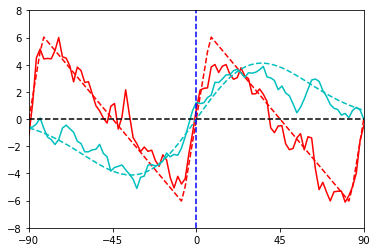

In [488]:
nb=-1
d_ori_u =  SDF.get_nb(nb,EVu['correctAngle'].values*d2r*2)*r2d/2

x0 = (8.5,7)
x,y = EVu.loc[:,'correctAngle'],EVu.loc[:,'E']

this_fit = optimize.minimize(sawtooth_loss,x0,(x,y))#,method='Nelder-Mead')
cardB = SDF.do_bining(bns,1,x,y)
plt.plot(bns,cardB,'r')
plt.plot(bns,sawtooth(this_fit.x,bns),'r--')
# plt.show()

x0_dog = (3,.01)
SDB = SDF.do_bining(bns,2,d_ori_u,y)
# plt.plot(bns,SDF.DoG(x0_dog,bns))
plt.plot(bns,SDB,'c')

this_fit_dog = optimize.minimize(dog_loss,x0_dog,(d_ori_u,y))#,method='Nelder-Mead')
plt.plot(bns,SDF.DoG(this_fit_dog.x,bns),'c--')
SDF.d_plot(1,8,-90)
plt.show()


In [489]:
this_fit_dog

      fun: 12.260947961739474
 hess_inv: array([[ 0.00046522, -0.0002875 ],
       [-0.0002875 ,  0.00023315]])
      jac: array([2.38418579e-07, 3.95774841e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 192
      nit: 19
     njev: 62
   status: 2
  success: False
        x: array([4.11788068, 0.02015282])

# Get stats for v4

In [537]:
d_distract =  SDF.wrap((EVu.distractAngle-EVu.correctAngle)*2)/2
#- attend vs. not CB and SD
ind_attend = EVu.trialProb>=50
ind_no_attend = EVu.trialProb<=49

subj_v4 = EVu.subject.unique()
n4 = len(subj_v4)
distract_bias = np.zeros((2,2,n4,n_bns)) # 


x0_dog = (0,.02)
summary_stats4 = pd.DataFrame()
dog_bnds = ((-10,10),(.01,.1))
for si,subj in enumerate(subj_v4):
    
    ind_subj = EVu.subject==subj
    for attend,inds in enumerate((ind_no_attend,ind_attend)):
        
        
        these_ind = ind_subj & inds
        x,y = EVu.loc[these_ind,'correctAngle'],EVu.loc[these_ind,'E']
        
        this_fit = optimize.minimize_scalar(sawtooth_loss_amp,args=(x,y))

        this_d = d_ori_u[these_ind]
        this_dist = d_distract[these_ind]
        distract_signed_E = np.concatenate((y[(this_dist>0)&(this_dist<d_rng)],-y[(this_dist<0)&(this_dist>-d_rng)]))
        distract_bias[attend,0,si] = SDF.do_bining(bns,4,this_dist,y*2*d2r,'circ_mean')*r2d/2
        distract_bias[attend,1,si] = SDF.do_bining(bns,4,this_dist,y*2*d2r,'circ_var')
        # fit DoG
        this_fit_dog = optimize.minimize(dog_loss,x0_dog,(this_d,y),bounds=dog_bnds)
        
        this_signed_E = np.concatenate((y[(this_d>0)&(this_d<d_rng)],-y[(this_d<0)&(this_d>-d_rng)]))
        distract_signed_E = np.concatenate((y[(this_dist>0)&(this_dist<d_rng)],-y[(this_dist<0)&(this_dist>-d_rng)]))
    
        this_s = {'subj':subj,'task':this_task,'CB_amp':this_fit.x,'SD_npAmp':np.mean(this_signed_E),
                  'SD_npAmp_circ':SDF.circ_mean(this_signed_E*d2r*2),'absE':np.mean(np.abs(y)),
                 'circ_var':SDF.circ_var(y*d2r*2),'DoG_amp':this_fit_dog.x[0]
                  ,'DoG_w':this_fit_dog.x[1],'DoG_suc':this_fit_dog.success,'attend':attend,
                 'distractor_amp':np.mean(distract_signed_E)}
        summary_stats4 = summary_stats4.append(this_s,ignore_index=1)


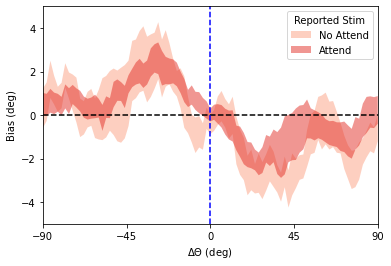

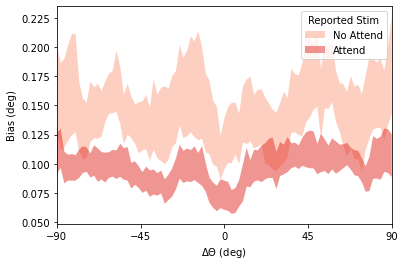

In [538]:
SDF.sem_plot(bns,distract_bias[0,0],alpha=.5,label='No Attend')
SDF.sem_plot(bns,distract_bias[1,0],alpha=.5,label='Attend')
SDF.d_plot(1,5,-90)
plt.xlabel('$\Delta\\Theta$ (deg)')
plt.ylabel('Bias (deg)')
plt.legend(title='Reported Stim')
plt.show()

SDF.sem_plot(bns,distract_bias[0,1],alpha=.5,label='No Attend')
SDF.sem_plot(bns,distract_bias[1,1],alpha=.5,label='Attend')
SDF.d_plot(0,0,-90)
plt.xlabel('$\Delta\\Theta$ (deg)')
plt.ylabel('Bias (deg)')
plt.legend(title='Reported Stim')
plt.show()

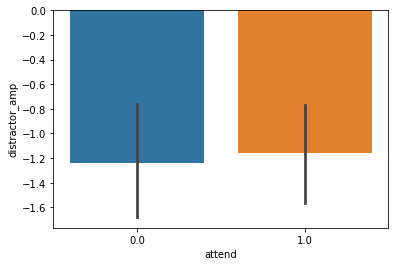

In [481]:
summary_stats = summary_stats4
sns.barplot(x='attend',y='distractor_amp',data=summary_stats,ci=68)
plt.show()

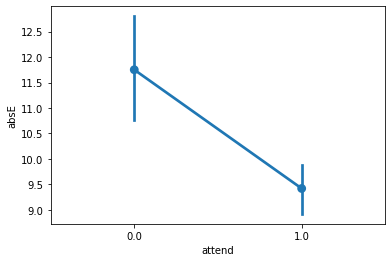

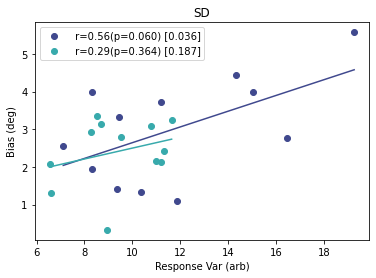

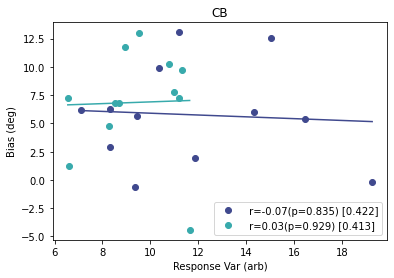

In [491]:
summary_stats = summary_stats4
sns.pointplot(x='attend',y='absE',data=summary_stats,ci=68)
plt.show()
var0,var1,var2 = 'absE','SD_npAmp','CB_amp'
vals0 = np.stack((summary_stats.loc[summary_stats.attend==0,var0].values,summary_stats.loc[summary_stats.attend==1,var0].values)).T

vals1 = np.stack((summary_stats.loc[summary_stats.attend==0,var1].values,summary_stats.loc[summary_stats.attend==1,var1].values)).T

vals2 = np.stack((summary_stats.loc[summary_stats.attend==0,var2].values,summary_stats.loc[summary_stats.attend==1,var2].values)).T


corr_plot(vals0,vals1)
plt.title('SD')
plt.show()

corr_plot(vals0,vals2)
plt.title('CB')
plt.show()

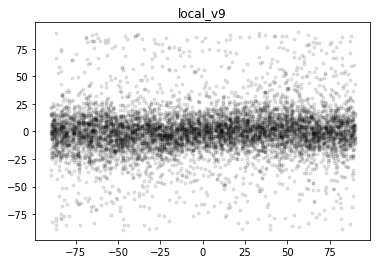

In [482]:
t_ind=4
d_ori = SDF.get_nb(nb,cEV['correctAngle'].values*d2r*2)*r2d/2
these_inds = cEV.taskVersion==tasks[t_ind]
plt.plot(d_ori[these_inds],cEV[these_inds].E,'k.',alpha=.1)
plt.title(tasks[t_ind])
plt.show()

In [484]:
cEV[these_inds]

,subject,taskVersion,trialProb,cueType,correctAngle,distractAngle,respAngle,E,RT,indProbed,grp,d,d_grp,grp_1
0,UCSD072,local_v9,80.0,Number,-53.3122,-83.0642,74.00,-52.6878,5011.9410,1,-56.0,65.1473,56.0,11.0
1,UCSD072,local_v9,80.0,Number,-86.8577,31.8449,-0.55,86.3077,5011.7521,1,-79.0,33.5455,34.0,-56.0
2,UCSD072,local_v9,50.0,Number,44.3241,48.1176,-84.73,50.9459,5011.7829,1,34.0,48.8182,56.0,-79.0
3,UCSD072,local_v9,20.0,Number,14.5722,-70.5850,21.09,6.5178,5012.2209,0,11.0,29.7519,34.0,34.0
4,UCSD072,local_v9,80.0,Number,76.8696,80.6631,63.36,-13.5096,5000.0498,1,79.0,-62.2974,-56.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,UCSD095,local_v9,80.0,Number,-15.7833,74.2162,-79.06,-63.2767,5000.0889,0,-11.0,26.0000,34.0,11.0
299,UCSD095,local_v9,80.0,Number,52.2167,-11.7838,69.11,16.8933,5011.7528,0,56.0,-68.0000,-79.0,-11.0
300,UCSD095,local_v9,20.0,Number,18.2162,-84.7833,80.04,61.8238,5000.0160,1,11.0,34.0005,34.0,56.0
301,UCSD095,local_v9,50.0,Number,-77.7833,-33.7838,23.36,-78.8567,5011.7540,0,-79.0,-84.0005,-79.0,11.0


In [562]:
y_att

0      71.3232
1     -30.4352
2     -30.4379
4     -12.8614
6       0.4766
        ...   
294   -13.9567
296    14.0433
297     2.2433
298   -63.2767
299    16.8933
Name: E, Length: 200, dtype: float64

In [595]:
# more general
d_rng=45
d_distract =  SDF.wrap((cEV.distractAngle-cEV.correctAngle)*2)/2
#- attend vs. not CB and SD
t_ind=4
ind_task = cEV.taskVersion==tasks[t_ind]

these_subj = cEV.loc[ind_task,'subject'].unique()
n_subj_this = len(these_subj)

distract_bias = np.zeros((3,2,n_subj_this,n_bns)) # attend/unattend, 1 vs 2
distract_bias_pos = np.zeros((2,2,n_subj_this,n_bns)) # attend/unattend, 1 vs 2
sd_bias = np.zeros((3,2,n_subj_this,n_bns)) #- toward prev target only...
sd_bias_att = np.zeros((3,n_subj_this,n_bns)) #- toward prev target only...

summary_stats_this = pd.DataFrame()
dog_bnds = ((-15,15),(.01,.1))

for si,subj in enumerate(these_subj):
    print(subj)
    ind_subj = cEV.subject==subj
    for attend,pProbe in enumerate((20,50,80)):
        for pos in range(2):
            
            these_ind = ind_subj & (cEV.trialProb==pProbe) & (cEV.indProbed==pos)
            x,y = cEV.loc[these_ind,'correctAngle'],cEV.loc[these_ind,'E']
        
            this_fit = optimize.minimize_scalar(sawtooth_loss_amp,args=(x,y)) # save time?

            this_d = d_ori[these_ind]
            this_dist = d_distract[these_ind]
            distract_signed_E = np.concatenate((y[(this_dist>0)&(this_dist<d_rng)],-y[(this_dist<0)&(this_dist>-d_rng)]))
            distract_bias[attend,pos,si] = SDF.do_bining(bns,4,this_dist,y*2*d2r,'circ_mean')*r2d/2
            
            sd_bias[attend,pos,si] = SDF.do_bining(bns,4,this_d,y*2*d2r,'circ_mean')*r2d/2
            
            if pos==0:
                these_pos_att = these_ind = ind_subj & (cEV.trialProb==pProbe)
                y_att = cEV.loc[these_pos_att,'E']
                this_d_att = d_ori[these_pos_att]
                sd_bias_att[attend,si] = SDF.do_bining(bns,4,this_d_att,y_att*2*d2r,'circ_mean')*r2d/2
                
            if pProbe==50:
                these_pos_inds = these_ind = ind_subj & (cEV.indProbed==pos)
                y_pos = cEV.loc[these_pos_inds,'E']
                this_dist_pos = d_distract[these_pos_inds]
                distract_bias_pos[pos,0,si] = SDF.do_bining(bns,4,this_dist_pos,y_pos*2*d2r,'circ_mean')*r2d/2
                distract_bias_pos[pos,1,si] = SDF.do_bining(bns,4,this_dist_pos,y_pos*2*d2r,'circ_var')

            # fit DoG
            this_fit_dog = optimize.minimize(dog_loss,x0_dog,(this_d,y),bounds=dog_bnds) # save time?

            this_signed_E = np.concatenate((y[(this_d>0)&(this_d<d_rng)],-y[(this_d<0)&(this_d>-d_rng)]))
            distract_signed_E = np.concatenate((y[(this_dist>0)&(this_dist<d_rng)],-y[(this_dist<0)&(this_dist>-d_rng)]))

            this_s = {'subj':subj,'task':this_task,'CB_amp':this_fit.x,'SD_npAmp':np.mean(this_signed_E),
                      'SD_npAmp_circ':SDF.circ_mean(this_signed_E*d2r*2),'absE':np.mean(np.abs(y)),
                     'circ_var':SDF.circ_var(y*d2r*2),'DoG_amp':this_fit_dog.x[0]
                      ,'DoG_w':this_fit_dog.x[1],'DoG_suc':this_fit_dog.success,'attend':pProbe,'pos':pos,
                     'distractor_amp':np.mean(distract_signed_E)}
            
            summary_stats_this = summary_stats_this.append(this_s,ignore_index=1)


UCSD072
UCSD073
UCSD074
UCSD076
UCSD077
UCSD078
UCSD079
UCSD085
UCSD086
UCSD087
UCSD088
UCSD089
UCSD090
UCSD091
UCSD092
UCSD093
UCSD094
UCSD095


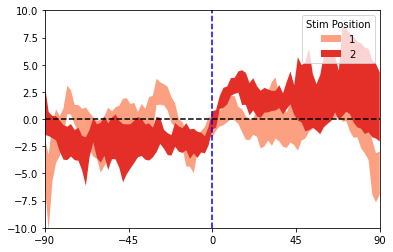

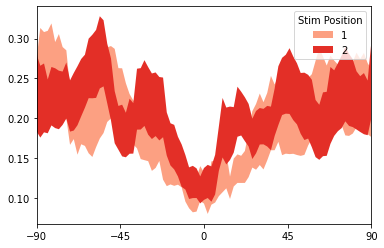

In [582]:
sns.set_palette('Reds',2)
SDF.sem_plot(bns,distract_bias_pos[0,0],label=1)
SDF.sem_plot(bns,distract_bias_pos[1,0],label=2)
SDF.d_plot(1,10,-90)
plt.legend(title='Stim Position')
plt.show()

sns.set_palette('Reds',2)
SDF.sem_plot(bns,distract_bias_pos[0,1],label=1)
SDF.sem_plot(bns,distract_bias_pos[1,1],label=2)
SDF.d_plot(0,0,-90)
plt.legend(title='Stim Position')
plt.show()

ignoring nan values!
ignoring nan values!
ignoring nan values!


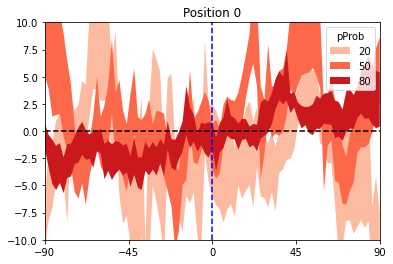

In [598]:
pos=0
for i in range(3):
    SDF.sem_plot(bns,sd_bias[i,0],label = (20,50,80)[i])
SDF.d_plot(1,10,-90)
plt.legend(title='pProb')
plt.title('Position %d' %(pos))
plt.show()

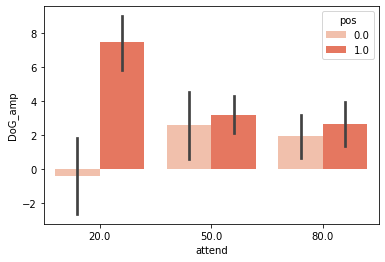

ignoring nan values!
ignoring nan values!


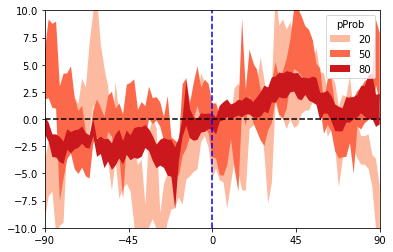

In [599]:
sns.barplot(data=summary_stats_this,x='attend',y='DoG_amp',hue='pos',ci=68)
plt.show()
sns.set_palette('Reds',3)
for i in range(3):
    SDF.sem_plot(bns,sd_bias_att[i],label = (20,50,80)[i])
SDF.d_plot(1,10,-90)
plt.legend(title='pProb')
plt.show()

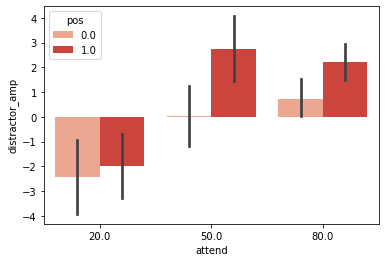

In [554]:
summary_stats = summary_stats_this
sns.barplot(x='attend',y='distractor_amp',hue='pos',data=summary_stats,ci=68)
plt.show()

ignoring nan values!
ignoring nan values!


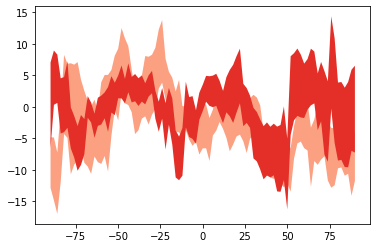

In [549]:
attend=0
SDF.sem_plot(bns,distract_bias[attend,0])
SDF.sem_plot(bns,distract_bias[attend,1])

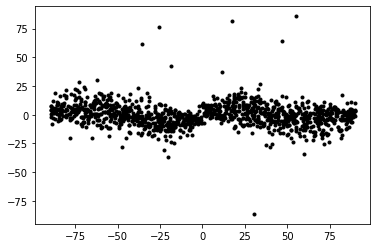

In [55]:
plt.plot(x,y,'k.')

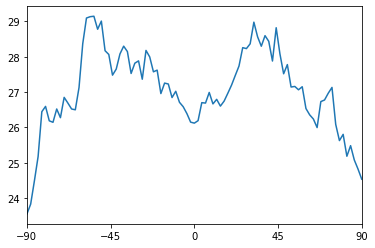

In [27]:
plt.plot(bns,this_cv)
SDF.d_plot(0,0,-90)
plt.show()

In [29]:
card_offset = np.array([5,30])
card_win = np.array([np.sort(SDF.wrap(card_offset*sign+this_card)) for this_card in (0,90) for sign in (-1,1)])
bin_cent = ('V','V','H','H')
bin_shift = ('CCW','CW','CCW','CW')


# card_offset_var = np.array([-1,1])*10 # widened to include 
# card_win_var = np.array([wrap(card_offset_var+this_card) for this_card in (0,90)])
# bin_cent_var = ('V','H')

card_offset_var = np.array([-1,1])*3 # widened to include 
card_win_var = np.array([SDF.wrap(card_offset_var+this_card) for this_card in (0,90,-45,45)])
bin_cent_var = ('V','H','-45','45')

In [35]:
this_bias

,Cardinal,Offset,RT,RespAcc,RespBias,subj,task
900,V,CCW,1394.5,0.917479,0.880472,_5be50b4daf4be,mTurk_v7
901,V,CW,1764.5,0.912668,-1.038721,_5be50b4daf4be,mTurk_v7
902,H,CCW,2198.0,0.843464,1.616499,_5be50b4daf4be,mTurk_v7
903,H,CW,NaN,NaN,NaN,_5be50b4daf4be,mTurk_v7


In [36]:
bin_cent_var

('V', 'H', '-45', '45')

In [32]:
bias_bin_df,var_bin_df,summary_stats = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
tasks = EV.taskVersion.unique()
for task in tasks:
    
    these_subjs = EV.loc[EV.taskVersion==task,'subject'].unique()
    
    for subj in these_subjs:
        
        this_subj = (EV.taskVersion==task)&(EV.subject==subj)
        if sum(this_subj)<100: continue
        for wi,win in enumerate(card_win):
            
            these_ind = this_subj&(EV.correctAngle>=win[0])&(EV.correctAngle<=win[1])
            this_E = EV[these_ind].E
            np_bias = SDF.circ_mean(this_E)
            np_acc= SDF.circ_var(this_E)
            RT = np.nanmedian(EV.RT[these_ind].values)
            bias_bin_df=bias_bin_df.append({'Cardinal':bin_cent[wi],'Offset':bin_shift[wi],'RespBias':np_bias,'RespAcc':np_acc,
                                            'RT':RT,'subj':subj,'task':task},
                                          ignore_index=1)
        for wi,win in enumerate(card_win_var):
            
            if win[0]<win[1]: # inside range
                these_ind = (EV.correctAngle>=win[0])&(EV.correctAngle<=win[1])
            else: # outer edges...
                these_ind = (EV.correctAngle>=win[0])|(EV.correctAngle<=win[1])
                
            these_ind = these_ind&this_subj
            this_E = EV.E[these_ind].values
            this_E_flip = this_E.copy()
            this_E_flip[EV.correctAngle.values[these_ind]<0]*=-1
            np_bias = SDF.circ_mean(this_E_flip)
#             np_acc= circ_sd(this_E_flip)
            np_acc= np.mean(np.abs(this_E_flip))
            RT = np.nanmedian(EV.RT[these_ind].values)
            var_bin_df=var_bin_df.append({'Cardinal':bin_cent_var[wi],'RespBias':np_bias,'RespAcc':np_acc,'RT':RT,
                                          'subj':subj,'task':task},
                                          ignore_index=1)
            
        this_bias = bias_bin_df.loc[(bias_bin_df.subj==subj)&(bias_bin_df.task==task)]
        d_vertical = this_bias.loc[(this_bias.Offset=='CW')&(this_bias.Cardinal=='V'),'RespBias'].values-this_bias.loc[(this_bias.Offset=='CCW')&(this_bias.Cardinal=='V'),'RespBias'].values
        d_horiz = this_bias.loc[(this_bias.Offset=='CW')&(this_bias.Cardinal=='H'),'RespBias'].values-this_bias.loc[(this_bias.Offset=='CCW')&(this_bias.Cardinal=='H'),'RespBias'].values
        cb_general = (d_horiz+d_vertical)/4
        cb_diff = (d_horiz-d_vertical)/2

        var_diff = var_bin_df.loc[(var_bin_df.subj==subj)&(var_bin_df.task==task)&(var_bin_df.Cardinal=='H'),'RespAcc'].values-\
        var_bin_df.loc[(var_bin_df.subj==subj)&(var_bin_df.task==task)&(var_bin_df.Cardinal=='V'),'RespAcc'].values
        summary_stats=summary_stats.append({'subj':subj,'task':task,'cb':cb_general[0],'cb_diff':cb_diff[0],'var_diff':var_diff[0]},ignore_index=1)

/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/pandas/core/nanops.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")
/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/pandas/core/nanops.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")
/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/pandas/core/nanops.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")
/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/

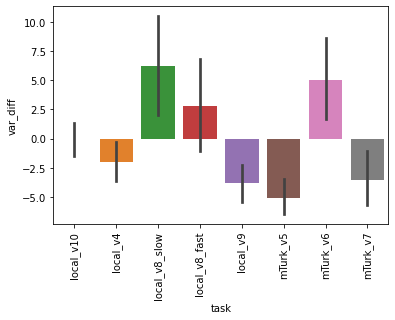

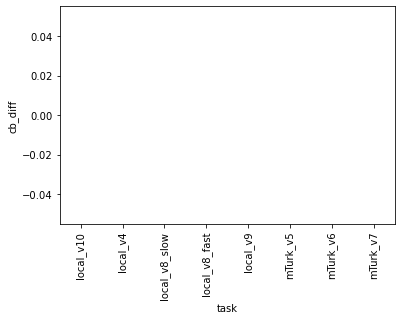

In [33]:
sns.barplot(data=summary_stats,y='var_diff',ci=68,x='task')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=summary_stats,y='cb_diff',ci=68,x='task')
plt.xticks(rotation=90)
plt.show()

In [72]:
this_bias = bias_bin_df.loc[(bias_bin_df.subj==subj)&(bias_bin_df.task==task)]
d_vertical = this_bias.loc[(this_bias.Offset=='CW')&(this_bias.Cardinal=='V'),'RespBias'].values-this_bias.loc[(this_bias.Offset=='CCW')&(this_bias.Cardinal=='V'),'RespBias'].values
d_horiz = this_bias.loc[(this_bias.Offset=='CW')&(this_bias.Cardinal=='H'),'RespBias'].values-this_bias.loc[(this_bias.Offset=='CCW')&(this_bias.Cardinal=='H'),'RespBias'].values
cb_general = (d_horiz+d_vertical)/4
cb_diff = (d_horiz-d_vertical)/2
bias_var = var_bin_df.loc[(var_bin_df.subj==subj)&(var_bin_df.task==task)&(var_bin_df.Cardinal=='H'),'RespAcc'].values-\
var_bin_df.loc[(var_bin_df.subj==subj)&(var_bin_df.task==task)&(var_bin_df.Cardinal=='V'),'RespAcc'].values


# np.mean(bias_bin_df.loc[(bias_bin_df.subj==subj)&(bias_bin_df.task==task)&(bias_bin_df.Offset=='CCW'),'RespBias'])

In [210]:
cb_general

15.484781180794297

In [203]:
np.mean(bias_bin_df.loc[(bias_bin_df.subj==subj)&(bias_bin_df.task==task)&(bias_bin_df.Offset=='CW'),'RespBias'])

15.484781180794297

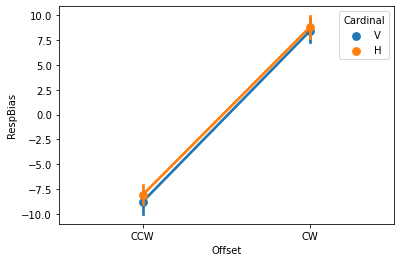

In [52]:
y_var = ['RespBias','RespAcc','RT'][0]
sns.pointplot(data=bias_bin_df,x='Offset',y=y_var,hue='Cardinal',ci=68)
plt.show()

In [31]:
# mdl= ols(y_var + '~Offset*Cardinal',data=bias_bin_df).fit()
mdl = smf.mixedlm(y_var + ' ~ Offset*Cardinal', bias_bin_df, groups=bias_bin_df["task"]).fit()
mdl.summary()

NameError: name 'smf' is not defined

In [25]:
import scipy.stats

In [62]:
var_bin_df

,Cardinal,RespBias,RespAcc,RT,subj,task
0,V,-2.869848,8.037693,5000.02600,UCSD100,local_v10
1,H,-6.760889,12.240461,5011.73460,UCSD100,local_v10
2,-45,-7.651527,17.228232,5011.74295,UCSD100,local_v10
3,45,-7.982024,20.547368,5000.03790,UCSD100,local_v10
4,V,5.882535,9.735300,5011.74000,UCSD101,local_v10
...,...,...,...,...,...,...
899,45,6.950307,9.017679,1077.00000,_5be4f9762da7e,mTurk_v7
900,V,5.374381,13.859305,1654.00000,_5be50b4daf4be,mTurk_v7
901,H,-6.509409,9.411490,1969.00000,_5be50b4daf4be,mTurk_v7
902,-45,-4.915327,7.756715,1990.00000,_5be50b4daf4be,mTurk_v7


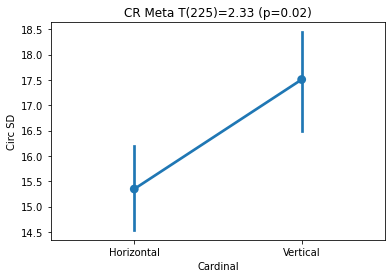

In [79]:
y_var = 'RespAcc'
# sns.pointplot(data=var_bin_df,x='Cardinal',y=y_var,hue='task',ci=68)
# plt.show()
sns.pointplot(data=var_bin_df,x='Cardinal',y=y_var,ci=68,order=['H','V'])
plt.ylabel('Circ SD')
these_vals = np.array([var_bin_df[var_bin_df.Cardinal=='V'][y_var].values, var_bin_df[var_bin_df.Cardinal=='H'][y_var].values])
this_t = scipy.stats.ttest_rel(these_vals[0],these_vals[1])

plt.title('CR Meta T(%d)=%.2f (p=%.2f)' %(these_vals.shape[1]-1,*this_t))
plt.xticks([0,1],['Horizontal','Vertical'])
plt.show()

<AxesSubplot:xlabel='Cardinal', ylabel='RespAcc'>

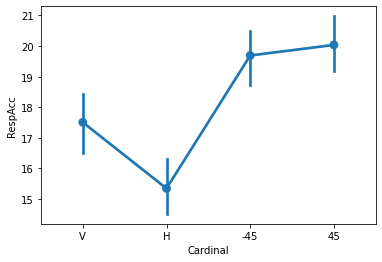

In [78]:
sns.pointplot(data=var_bin_df,x='Cardinal',y=y_var,ci=68)

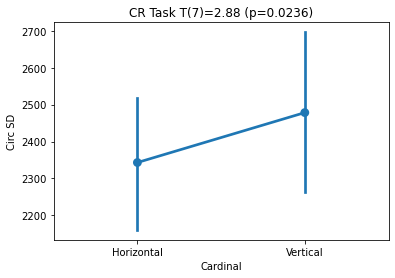

In [84]:
y_var='RT'
group_task_var = var_bin_df.groupby(['Cardinal','task'])[y_var].mean().reset_index()
sns.pointplot(data=group_task_var,x='Cardinal',y=y_var,ci=68,order=['H','V'])

these_vals = np.array([group_task_var[group_task_var.Cardinal=='V'][y_var].values, group_task_var[group_task_var.Cardinal=='H'][y_var].values])
this_t = scipy.stats.ttest_rel(these_vals[0],these_vals[1])
plt.title('CR Task T(%d)=%.2f (p=%.4f)' %(these_vals.shape[1]-1,*this_t))
plt.xticks([0,1],['Horizontal','Vertical'])
plt.ylabel('Circ SD')
plt.show()

In [177]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

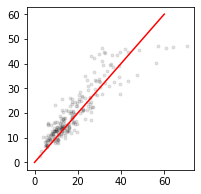

In [187]:
var_bin_df.head()
d_all = var_bin_df[var_bin_df.Cardinal=='V'].RespAcc.values-var_bin_df[var_bin_df.Cardinal=='H'].RespAcc.values
# plt.hist(d_all,30)
plt.figure(figsize=(3,3))
plt.plot(var_bin_df[var_bin_df.Cardinal=='H'].RespAcc.values,var_bin_df[var_bin_df.Cardinal=='V'].RespAcc.values,'k.',alpha=.1)
# plt.plot([0,2.5],[0,2.5],'r')
plt.plot([0,60],[0,60],'r')
plt.show()
# d_all

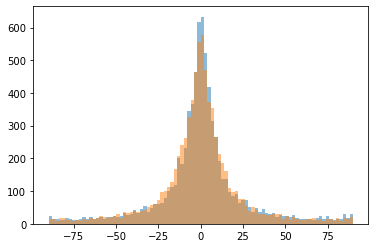

In [168]:
n_bns = 91
bns = np.linspace(-90,90,n_bns)
ind_vertical = (EV.correctAngle>=card_win_var[0,0])&(EV.correctAngle<=card_win_var[0,1])
ind_horizontal = (EV.correctAngle>=card_win_var[1,0])|(EV.correctAngle<=card_win_var[1,1])
plt.hist(EV[ind_vertical].E,bns,alpha=.5)
plt.hist(EV[ind_horizontal].E,bns,alpha=.5)
plt.show()

/home/AD/tsheehan/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/AD/tsheehan/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='E', ylabel='Density'>

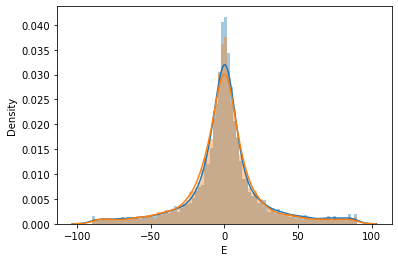

In [171]:
sns.distplot(EV[ind_vertical].E,bns)
sns.distplot(EV[ind_horizontal].E,bns)

NameError: name 'scipy' is not defined

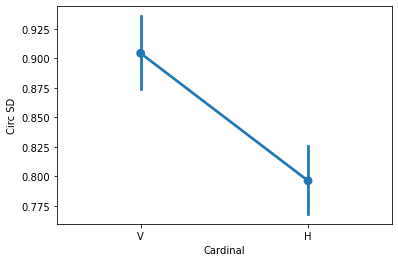

In [81]:
y_var = 'RespAcc'
sns.pointplot(data=var_bin_df,x='Cardinal',y=y_var,ci=68)
plt.ylabel('Circ SD')
these_vals = np.array([var_bin_df[var_bin_df.Cardinal=='V'][y_var].values, var_bin_df[var_bin_df.Cardinal=='H'][y_var].values])
this_t = scipy.stats.ttest_rel(these_vals[0],these_vals[1])
plt.title('MTurk_v5 T(%d)=%.2f (p=%.3f)' %(len(these_vals)-1,*this_t))
plt.show()

['local_v10' 'local_v4' 'local_v8_slow' 'local_v8_fast' 'local_v9'
 'mTurk_v5' 'mTurk_v6' 'mTurk_v7']


/home/AD/tsheehan/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


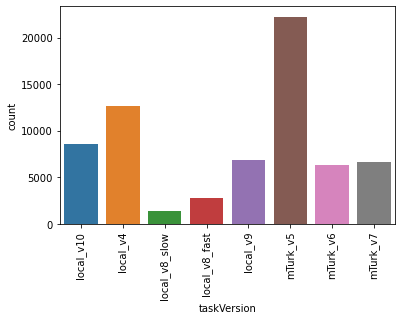

In [40]:
# lets get np bias across datasets and subjects
print()
sns.countplot(EV.taskVersion)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='d_grp', ylabel='E'>

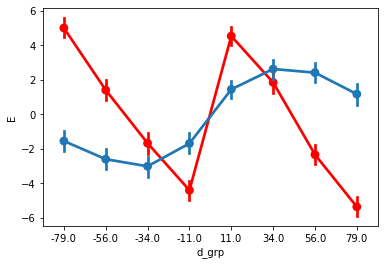

In [16]:
# sns.jointplot(x='correctAngle',y='respAngle',data=EVu,kind='hex')
sns.pointplot(x='grp',y='E',data=EV,color='r')
sns.pointplot(x='d_grp',y='E',data=EV)

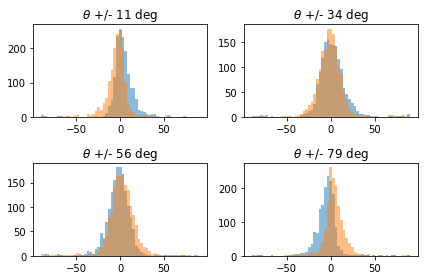

In [18]:
# oposing histograms
inds = np.sort(np.abs(nam[:4]))
bns= np.linspace(-90,90,60)
ii=0
for i in inds:
    ii+=1
    plt.subplot(2,2,ii)
    ind_view = EVu.grp==i
    plt.hist(EVu[ind_view].E,bns,alpha=.5)
    ind_view = EVu.grp==-i
    plt.hist(EVu[ind_view].E,bns,alpha=.5)
    plt.title('$\\theta$ +/- %d deg' %i)
plt.tight_layout()
plt.show()

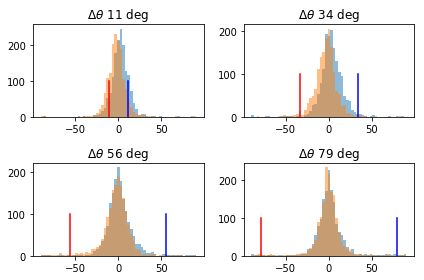

In [127]:
ii=0
ht = [0,100] # height line
for i in inds:
    ii+=1
    plt.subplot(2,2,ii)
    ind_view = EVu.d_grp==i
    plt.hist(EVu[ind_view].E,bns,alpha=.5)
    plt.plot([i,i],ht,'b')
    ind_view = EVu.d_grp==-i
    plt.hist(EVu[ind_view].E,bns,alpha=.5)
    plt.plot([-i,-i],ht,'r')
    plt.title('$\Delta \\theta$ %d deg' %i)
plt.tight_layout()
plt.show()

In [31]:
# compare bias of distribution with sliding window
windows = np.linspace(0,90,19)
var_want = 'correctAngle'
var_want = 'd'

ts = []
bns = []
for i in range(len(windows)-2):
    ind_view = (EVu[var_want]>=windows[i])&(EVu[var_want]<=windows[i+2])
    grp0 = EVu[ind_view].E.values
    ind_view = (EVu[var_want]<=-windows[i])&(EVu[var_want]>=-windows[i+2])
    grp1 = EVu[ind_view].E.values
    ts.append(stats.ttest_ind(grp0,grp1)[0])
    bns.append(windows[i+1])

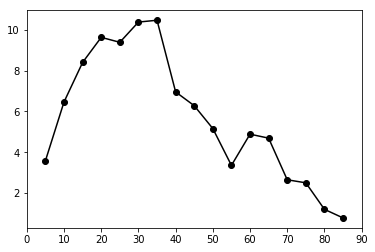

In [32]:
plt.plot(bns,ts,'ko-')
plt.xlim([0,90])
plt.show()

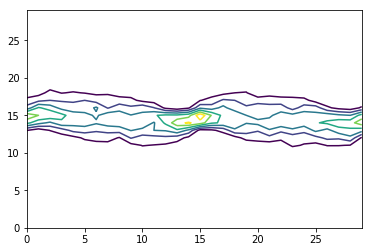

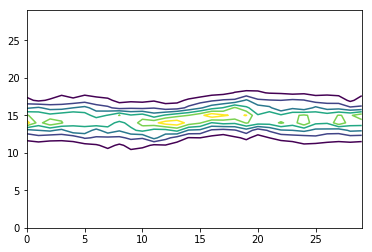

In [50]:
# out = plt.hist2d(EVu.correctAngle,EVu.E,30)
out = np.histogram2d(EVu.correctAngle,EVu.E,30)
plt.contour(out[0].T)
plt.show()

out = np.histogram2d(EVu.d,EVu.E,30)
plt.contour(out[0].T)
plt.show()

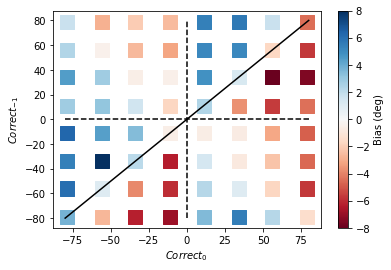

In [84]:
# foo = EVu.groupby(['grp','d_grp']).E.mean().reset_index()
foo = EVu.groupby(['grp','grp_1']).E.mean().reset_index()
# plt.scatter(foo.grp,foo.d_grp,s=200,c=foo.E,marker='s')
plt.scatter(foo.grp,foo.grp_1,s=200,c=foo.E,marker='s')
plt.set_cmap('RdBu')
plt.xlabel('$Correct_0$')
# plt.ylabel('$Correct_{-1}-Correct_0$')
plt.ylabel('$Correct_{-1}$')
cb = plt.colorbar()
cb.set_label('Bias (deg)')
plt.plot([-80, 80],[0,0],'k--')
plt.plot([0,0],[-80, 80],'k--')
plt.plot([-80,80],[-80, 80],'k-')
plt.clim(-8,8)
plt.show()

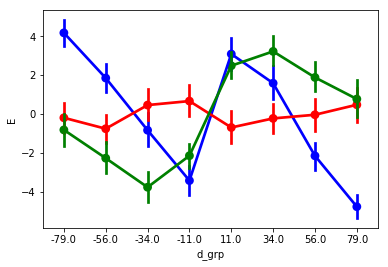

In [88]:
sns.pointplot(x='grp',y='E',data=EVu,color='b')
sns.pointplot(x='grp_1',y='E',data=EVu,color='r')
sns.pointplot(x='d_grp',y='E',data=EVu,color='g')

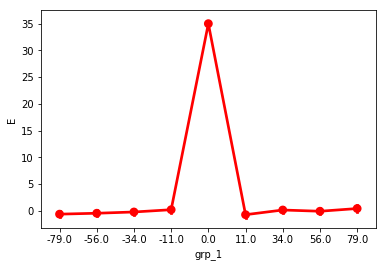

In [100]:
sns.pointplot(x='grp_1',y='E',data=EV,color='r')

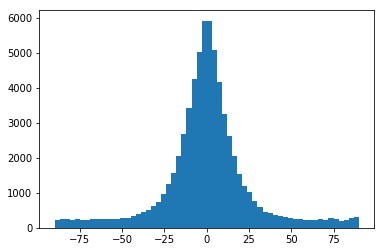

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([34.4731, 34.5731, 34.6731, 34.7731, 34.8731, 34.9731, 35.0731,
        35.1731, 35.2731, 35.3731, 35.4731]),
 <a list of 10 Patch objects>)

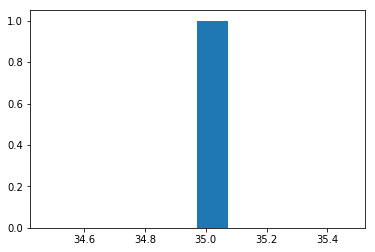

In [108]:
plt.hist(EV.E,60)
plt.show()
plt.hist(EV[EV.grp_1==0].E)

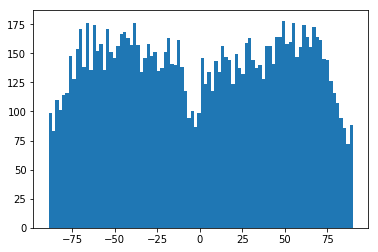

In [119]:
plt.hist(EVu.respAngle,90)
plt.show()